<a href="https://colab.research.google.com/github/shreshtha77/Gold-Price-Prediction/blob/main/Gold_Price_Prediction_using_Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Gold Price Prediction using Machine Learning**

#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data collection and processing

In [3]:
#loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv("/content/gold_price_data.csv")

In [4]:
#print first 5 rows in the dataFrame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#no of rows and columns
gold_data.shape

(2290, 6)

In [7]:
#getting info about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking missing values
gold_data.isnull()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [9]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
#statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#Correlation:
  1. Positive Correlation
  2. Negative Correlation

In [11]:
correlation = gold_data.corr()

<ipython-input-11-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

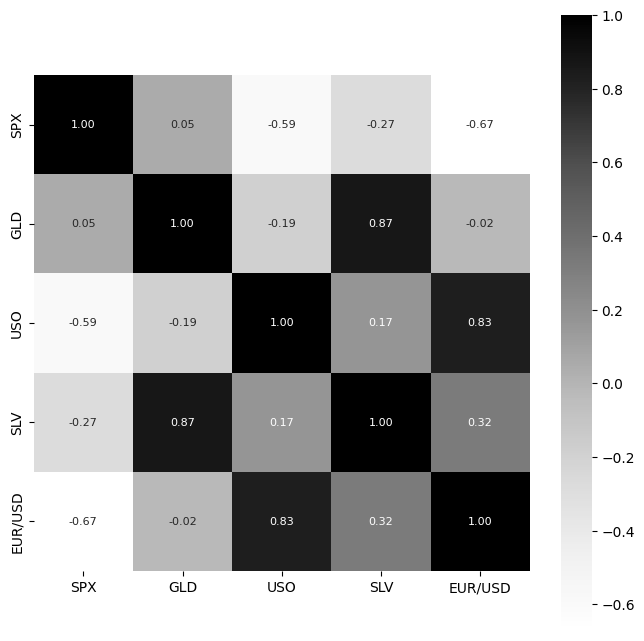

In [20]:
#constructing heatmap to understand the correlation
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.2f', annot = True, annot_kws = {'size' : 8}, cmap = 'Greys')

In [21]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-25-361e033489da>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'blue')


<Axes: xlabel='GLD', ylabel='Density'>

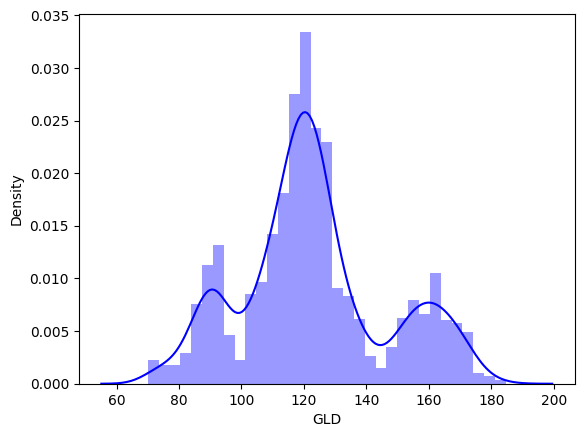

In [25]:
#check the distribution of the gold price
sns.distplot(gold_data['GLD'], color = 'blue')

# Splitting the Features and Target

In [26]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [27]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


#Separating Training and Testing data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

#Model Training : Random Forest Regressor

In [35]:
regressor = RandomForestRegressor(n_estimators = 100)

In [36]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

#Model Evaluation

In [37]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [38]:
print(test_data_prediction)

[168.63809936  82.16959977 116.0951003  127.60390088 120.6911013
 154.76559815 150.34039807 126.12200068 117.54739867 125.93280068
 116.78520074 172.00780106 141.28249824 167.46299804 115.26710035
 117.89970084 136.65300417 170.18450108 159.4083026  159.72229914
 154.9619999  125.09030026 174.76349986 156.58130327 125.19630045
  94.00819984  78.4061998  120.33529958 119.10089942 167.37480067
  88.14650064 125.22269929  91.09280081 117.7746002  121.18889909
 135.93890034 115.32400133 114.86840062 147.07069961 107.43230104
 104.17810263  87.05689755 126.52870036 117.86749998 152.63809954
 119.61709993 108.33710042 108.41439878  93.20380067 126.97849833
  75.2128004  113.61979929 121.12639963 111.20929897 118.81969913
 120.90059921 158.89180046 166.83850175 146.74359677  85.89559846
  94.45240041  86.83559874  90.32980012 118.96640087 126.38620054
 127.36219994 169.63950064 122.22489936 117.1562991   98.38579993
 167.72790107 143.07339759 131.88250275 121.05800225 121.39149938
 119.797200

In [39]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.988860885551698


#Compare actual and predicted values

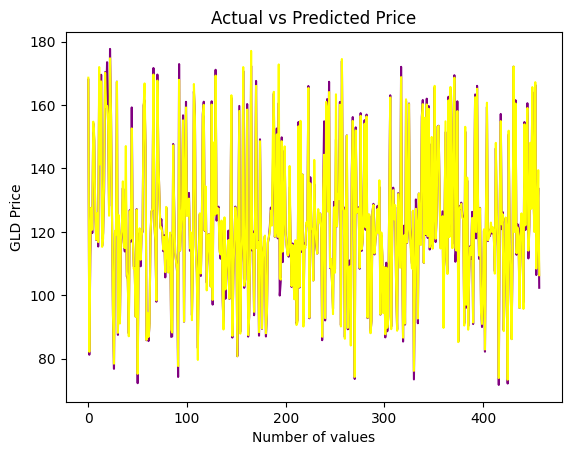

In [42]:
Y_test = list(Y_test)

plt.plot(Y_test, color = 'purple', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'yellow', label = 'Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.show()